In [1]:
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import numpy as np 
from dataloaders import Cifar10DataLoader
import utils

# Traing, Evaluating, and Testing 

- ## Trainig the Model on Training Dataset

In [3]:
# !python ./train.py --config ./configs/train.yaml

- ## Evaluating the Model on Validation dataset 

In [4]:
# !python ./evaluation.py --config ./configs/evaluation.yaml

- ## Testing the model on Test dataset

In [5]:
# !python ./evaluation.py --config ./configs/test.yaml

# Plotting

- ## Plotting Training and Evaluation Loss and Accuracy in Different Epochs

In [5]:
train_report = pd.read_csv("./train_report.csv", index_col="Unnamed: 0")

train_report.tail()

,epoch,batch_index,batch_size,accuracy,ongoing_accuracy,loss,phase
49995,19.0,495.0,20.0,0.65,0.447984,1.074906,val
49996,19.0,496.0,20.0,0.55,0.448189,1.810695,val
49997,19.0,497.0,20.0,0.55,0.448394,1.753608,val
49998,19.0,498.0,20.0,0.45,0.448397,1.736472,val
49999,19.0,499.0,20.0,0.40,0.448300,1.698884,val


In [6]:
train_report["loss_batch"] = train_report["loss"] * train_report["batch_size"]
train_report["num_correct_batch"] = train_report["accuracy"] * train_report["batch_size"]
train_report["iteration"] = (train_report["batch_index"].max()+1) * train_report["epoch"] + train_report["batch_index"]

train_report.tail()

,epoch,batch_index,batch_size,accuracy,ongoing_accuracy,loss,phase,loss_batch,num_correct_batch,iteration
49995,19.0,495.0,20.0,0.65,0.447984,1.074906,val,21.498113,13.000001,38495.0
49996,19.0,496.0,20.0,0.55,0.448189,1.810695,val,36.213892,11.000000,38496.0
49997,19.0,497.0,20.0,0.55,0.448394,1.753608,val,35.072164,11.000000,38497.0
49998,19.0,498.0,20.0,0.45,0.448397,1.736472,val,34.729438,9.000000,38498.0
49999,19.0,499.0,20.0,0.40,0.448300,1.698884,val,33.977687,8.000000,38499.0


In [7]:
train_report_loss_acc = train_report[["epoch", "phase", "batch_size", "loss_batch", "num_correct_batch"]].groupby(by=["epoch", "phase"]).sum().reset_index()
train_report_loss_acc["loss_mean"] = train_report_loss_acc["loss_batch"] / train_report_loss_acc["batch_size"]
train_report_loss_acc["accuracy"] = train_report_loss_acc["num_correct_batch"] / train_report_loss_acc["batch_size"]

train_report_loss_acc

,epoch,phase,batch_size,loss_batch,num_correct_batch,loss_mean,accuracy
0,0.0,train,40000.0,78469.635090,11204.000170,1.961741,0.280100
1,0.0,val,10000.0,18380.259275,3297.000050,1.838026,0.329700
2,1.0,train,40000.0,72598.693566,13639.000204,1.814967,0.340975
3,1.0,val,10000.0,17730.757433,3556.000048,1.773076,0.355600
4,2.0,train,40000.0,70942.047082,14141.000211,1.773551,0.353525
5,2.0,val,10000.0,18209.177636,3321.000050,1.820918,0.332100
6,3.0,train,40000.0,69604.254063,14853.000242,1.740106,0.371325
7,3.0,val,10000.0,17633.621030,3600.000053,1.763362,0.360000
8,4.0,train,40000.0,67869.885270,15412.000244,1.696747,0.385300
9,4.0,val,10000.0,16997.150705,3878.000063,1.699715,0.387800


In [8]:
train_loss_acc = train_report_loss_acc[ train_report_loss_acc["phase"] == "train"]
validation_loss_acc = train_report_loss_acc[ train_report_loss_acc["phase"] == "val"]

In [10]:
validation_loss_acc

,epoch,phase,batch_size,loss_batch,num_correct_batch,loss_mean,accuracy
1,0.0,val,10000.0,18380.259275,3297.000050,1.838026,0.3297
3,1.0,val,10000.0,17730.757433,3556.000048,1.773076,0.3556
5,2.0,val,10000.0,18209.177636,3321.000050,1.820918,0.3321
7,3.0,val,10000.0,17633.621030,3600.000053,1.763362,0.3600
9,4.0,val,10000.0,16997.150705,3878.000063,1.699715,0.3878
11,5.0,val,10000.0,17383.300593,3785.000062,1.738330,0.3785
13,6.0,val,10000.0,16681.822436,3973.000061,1.668182,0.3973
15,7.0,val,10000.0,17338.755840,3763.000063,1.733876,0.3763
17,8.0,val,10000.0,17152.653748,3795.000058,1.715265,0.3795
19,9.0,val,10000.0,17094.056991,3811.000054,1.709406,0.3811


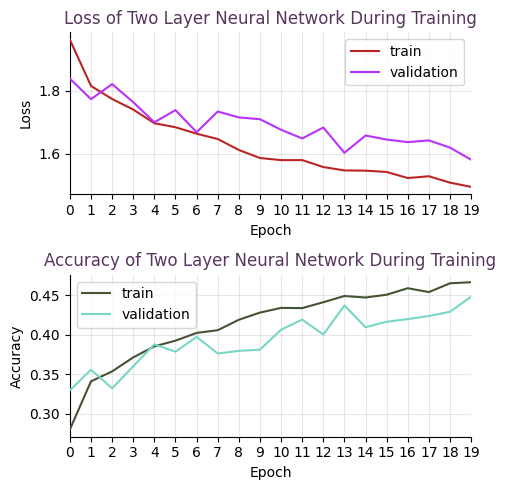

In [27]:
num_epochs = train_report_loss_acc["epoch"].max() + 1

fig = plt.figure(figsize=(5,5))

################ Loss ################
ax = plt.subplot(2, 1, 1)
plt.plot(train_loss_acc["epoch"], train_loss_acc["loss_mean"], color="#BB2525", zorder=5, label="train")
plt.plot(validation_loss_acc["epoch"], validation_loss_acc["loss_mean"], color="#B931FC", zorder=5, label="validation")

# Setting xticks
ax.set_xticks(np.arange(0,num_epochs))

# setting x axis limit
ax.set_xlim([0,19]) 

# setting x and y labels
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

# remove top and right border
# ax  = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# adding grid
plt.grid(alpha=0.3, zorder=0)

# setting a title 
ax.set_title("Loss of Two Layer Neural Network During Training", color="#57375D")

# adding legend
plt.legend()

################ Accuracy ################
ax = plt.subplot(2, 1, 2)
plt.plot(train_loss_acc["epoch"], train_loss_acc["accuracy"], color="#435334", zorder=5, label="train")
plt.plot(validation_loss_acc["epoch"], validation_loss_acc["accuracy"], color="#78D6C6", zorder=5, label="validation")

# setting xticks
ax.set_xticks(np.arange(0,num_epochs))

# setting x axis limit
ax.set_xlim([0,19]) 

# setting x and y labels
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")

# remove top and right border
# ax  = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# adding grid
plt.grid(alpha=0.3, zorder=0)

# setting a title 
ax.set_title("Accuracy of Two Layer Neural Network During Training", color="#57375D")

# adding legend
plt.legend()

################ Showing ################
fig.tight_layout()
plt.show()